<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span><ul class="toc-item"><li><span><a href="#System-Scoping" data-toc-modified-id="System-Scoping-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>System Scoping</a></span></li><li><span><a href="#Model-Construction" data-toc-modified-id="Model-Construction-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model Construction</a></span></li><li><span><a href="#Empirical-Models" data-toc-modified-id="Empirical-Models-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Empirical Models</a></span><ul class="toc-item"><li><span><a href="#Empirical-Models:-Lookup-Table" data-toc-modified-id="Empirical-Models:-Lookup-Table-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Empirical Models: Lookup Table</a></span></li></ul></li><li><span><a href="#Linear-Interpolation" data-toc-modified-id="Linear-Interpolation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Linear Interpolation</a></span></li></ul></li><li><span><a href="#Assignment" data-toc-modified-id="Assignment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Assignment</a></span><ul class="toc-item"><li><span><a href="#Deliverables:-Model-Construction" data-toc-modified-id="Deliverables:-Model-Construction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Deliverables: Model Construction</a></span></li><li><span><a href="#Deliverables:-Model-Evaluation" data-toc-modified-id="Deliverables:-Model-Evaluation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Deliverables: Model Evaluation</a></span></li></ul></li></ul></div>

# Challenge

This assignment's challenge is to develop a model that will predict the height of water in a tank that is losing water through a valve. Given an initial height, your model should be able to predict what the height of water in the tank will be *up to 25 seconds later*.  

In [ ]:
%%html
<iframe width="900" height="540" src="https://www.youtube.com/embed/_o_DlWW5_wU" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

How could we make this kind of prediction? Well, as before, the first step is to decide what the scope of the system is.

## System Scoping

Given that the height of water in the tank is our primary concern, this makes sense to use as our system's output. The valve, seemingly involved somehow in changing the tank's height, will also be part of the system we consider.

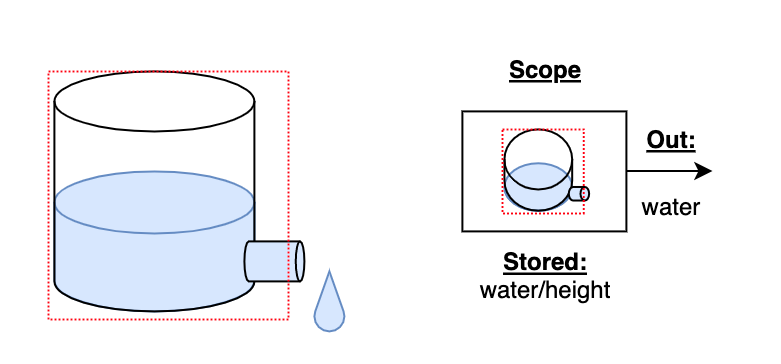

To start, we will say that the water, tank and valve are all considered part of the system. Therefore, the model's scope will include the amount of stored water in the tank. Additionally, water will cross the system boundary into the "outside world," causing the tank height to decrease over time.

## Model Construction

Once we move on to the model construction phase, we're in a bit of a bind. In order to make the predictions we need to make, it is necessary to develop an equation or set of equations that describe how the water height changes when the valve is open.

In the last assignment, we used Newton's Laws as tools to build the equations that made up our model. This situation is a bit different. How could we treat the water in the tank as a "free body" in an FBD? Water, it seems, doesn't quite react the same way as a block of wood. 

If we follow the example of scientists throughout the ages, we may be able to make some headway. Many major discoveries (including Newton's work) were inspired by *observations* first. So to start to understand how we might build a model for our system, we will first use an experiment to give us some idea of what we're up against. Below, I've pasted a plot of three different tests conducted *using a different valve setting than the one in the video*, each 25 seconds long, and all starting from the same water depth of $9cm$.

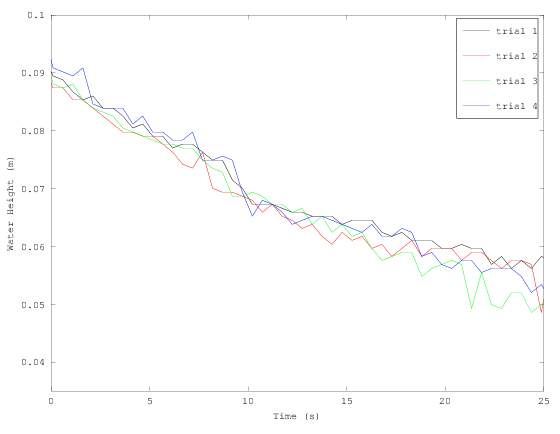

As we can see, it seems like the behavior of the tank is at least consistent for a particular valve setting. The bad news is that it doesn't look much like  anything we have seen. When the tank is empty, no more water flows out-- this means that something like the "constant acceleration" paradigm that we used to build a model for x(t) in the incline problem definitely won't apply... if it did, we would expect height to keep decreasing forever, and at a faster and faster rate!

With this in mind, it may sound like we have "no tools at all" with which we could construct a model. But we do have data! So  at least as a first step, we may be able to use *one* set of data to build what is called a *purely emprirical model* of the tank system.

## Empirical Models

A purely empirical model is one that is derived using data. The inner workings of the relationships between system inputs and outputs may be unknown, but using *past knowledge* of the behavior of a system (or sometimes, just one element in a system), the future of the same system or element can be predicted.

Empirical models are often used in the early stages of modeling, when the behavior of a system or element is mysterious. They can also be used in situations where it is unlikely that a principled physical model for a system or element's behavior will be accurate, or when it is practically impossible to obtain.

### Empirical Models: Lookup Table

The simplest form of a "model" that is based on past experience is what we call a *lookup table*. This is no different than the original, collected data itself. The idea is that "if the system acted this way once, perhaps it will act similarly the next time we run the experiment." Let's look at an example in the MATLAB/Octave language. Say you had data for a model that related time $t$ to some output $y$. You collected data in a table that looks like the following:


**$t$**|**$y$**
:-----:|:-----:
0 | 10
0.5|10.09
1|10.264
1.5|10.442
2|10.594
2.5|10.713
3|10.801
3.5|10.864
4|10.908
4.5|10.939
5|10.96
5.5|10.973
6|10.983
6.5|10.989
7|10.993
7.5|10.995
8|10.997

You can plot the data in MATLAB quite easily, as shown in the cell below.

In [ ]:
t = [0 0.5 1 1.5 2 2.5 3 3.5 4 4.5 5 5.5 6  6.5 7 7.5 8]'; %the ' at the end means 'transpose,' or turn rows into columns. Makes this a "tall" array.
y = [ 10 10.09 10.264 10.442 10.594 10.713 10.801 10.864 10.908 10.939 10.96 10.973 10.983 10.989 10.993 10.995 10.997]'; %see comment above.

plot(t,y,'kx-','linewidth',4)
xlabel('t')
ylabel('y')

Then, let's say I suspected that this behavior would be the same every time I collected similar data.

If these assumptions were correct, and I needed to answer the question: 

**If $y$ begins at 10.594 in a new experiment, what will the value of $y$ be three seconds later?**

I could do this. If I look at either the table of data or the plot itself, I can see that in my original data, $y=10.594$ when $t=2.0$. To find out what $y$ would be three seconds later than that, I would simply need to look at my table to see what value $y$ takes at $t=5$ in my original table (three seconds later than $t=2$). If I looked in the table, I could plainly see that the answer I'm looking for is $y=10.96$!

This is the basic idea of a lookup table. These are actually used in practice in many branches of engineering, including thermodynamics and heat transfer. They're also used in your car, to tell the computer how much fuel is needed for a given combination of RPM and throttle position. They are helpful when a "closed form" mathematical equation is either practically impossible or too computationally intensive to obtain.

The idea of a simple empirical model like a lookup table is certainly attactive. But what if the question we asked above was just a little different:

**If $y$ begins at 10.25 in a new experiment, what will the value of $y$ be 2.3 seconds later?**

Think about how you might approach this problem using the lookup table as your "model." We don't have a row in the table that would tell us where the system is at $t=2.3$ seconds later, since the time interval of our data was $0.5$ seconds. We also don't have a row in the table that tells us the value of $t$ when $y=10.25$. What could we do about this?

Well, you may notice that when MATLAB plots the data, it uses *lines* to connect the $t,y$ pairs in our data set. We can see by looking at the shape of the plot that there is probably some curvature between points, but because the data points are close together, approximating the "unknown zones" between actual measurements using a line segment is probably not so bad! This process is called *linear interpolation*, and the details are explained below.

## Linear Interpolation

*interpolation* is the process of *inferring* the value of a dependent variable (output) given a table of data consisting of independent and dependent variable pairs. Consider the following data set, in which pairs of time and y values were collected. We can infer what the value of $y$ would be *in between* two data points collected at times $t_4$ and $t_5$ by assuming that the value of $y$ varies *linearly* in between these two points. While this is probably not strictly true, it is often a good approximation if the time difference between $t_4$ and $t_5$ is small relative to how fast $y$ changes.

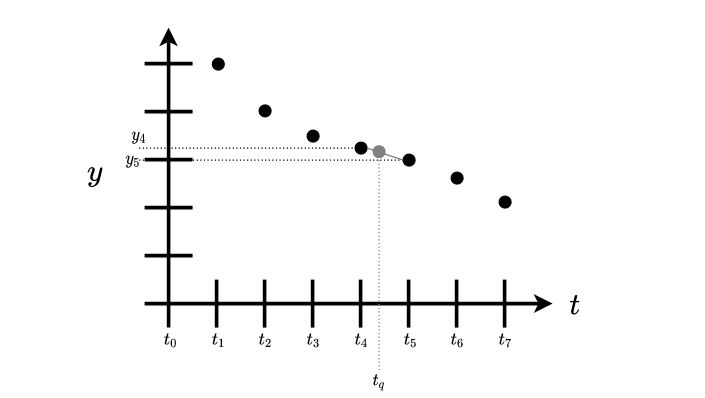

In the picture above, $t_q$ is a point in beytween $t_4$ and $t_5$ where we wish to approximate the corresponding value of the output $y$ by assuming that $y$ follows the shape of a line in between the two known data points $(t_4,y_4)$ and $(t_5,y_5)$.

Using the equation for a line in point-slope form where $(t_4,y_4)$ represents a known value of the dependent variable $y$ at a known value of the independent variable $t$, and $m$ represents the slope of the line, we can write the equation for the entire line (shown in red in the picture):

$$ y = m(t-t_4) + y_4$$

Where the slope $m$ is given by "rise over run" in the equation:

$$m = \frac{y_5-y_4}{t_5-t_4}$$

All together, this means that the value we wish to approximate can be found using:

$$ y(t_q) = \frac{y_5-y_4}{t_5-t_4}(t_q-t_4) + y_4 $$

This procedure can be implemented in code using MATLAB so that you can find the approximate value of $y$ for *any* time $t$ in between $t_0$ and $t_8$, as long as there is only ever one unique value of $y$ for each value of $t$. Formally, we say that this requirement means that the function $y(t)$ is *single-valued*.

In MATLAB/Octave, there is a function called "interp1" that does this procedure for you. To learn how to use it, type "help interp1" into a code cell in the  Jupyter notebook or on a MATLAB command prompt.

In [ ]:
help interp1

Now, to answer our modified version of the modeling question, which was:

**If $y$ begins at 10.25 in a new experiment, what will the value of $y$ be 2.3 seconds later?**

We actuually need to run the "interp1" function twice. To find out *when*, in our original table, $y=10.25$, we actually have to run the interpolation for $t$ vs. $y$, rather than $y$ vs. t. Let's try this below, and plot our results.

In [ ]:
% first, look at a data set.
td = [0 0.5 1 1.5 2 2.5 3 3.5 4 4.5 5 5.5 6  6.5 7 7.5 8]'; %the ' at the end means 'transpose,' or turn rows into columns. Makes this a "tall" array.
yd = [ 10 10.09 10.264 10.442 10.594 10.713 10.801 10.864 10.908 10.939 10.96 10.973 10.983 10.989 10.993 10.995 10.997]'; %see comment above.
% the first job is to find t at which y=10.25. We can do this using interpolation for t vs. y.
% this is easy if we flip the independent (x) and dependent (y) axes.
ystart = 10.25;
tstart = interp1(y,t,ystart) %remember interp1 takes form yquery = interp1(xvalues,yvalues,xquery)

% let's look at what the plot  of y vs. t looks like to check our work. 
% we will place a red circle at the point (tstart, ystart) to make sure finding the time worked.
plot(td,yd,'kx-','linewidth',4,tstart,ystart,'ro')
xlabel('t')
ylabel('y')
%add a legend so we know what is what
legend('table data','start position')

%great! now if we want to find the value of y 2.3 seconds after we "Start" at y=10.25, 
% t=tstart, we need to get the absolute time we're looking for, and then run the interpolation for y vs. t.
tlater = 2.3; % make a variable for this
ylater = interp1(t,y,tstart+tlater);% find the value of y at the "total" time tstart + tlater.

%now, display our final answer:
disp('if we start the experiment at y=10.25, the value of y 2.3 seconds later will be:')
ylater

figure
%just to visualize this on the plot, let's plot this point along with the data and our start point.
plot(td,yd,'kx-','linewidth',4,tstart,ystart,'ro',tstart+tlater,ylater,'go')
xlabel('t')
ylabel('y')
%add a legend so we know what is what
legend('table data','start position','query position')

If you eyeball the plot, you can see that the interpolation worked! It is a pretty powerful concept you can use to form a model using a lookup table, and use it to predict future behavior of a system or element.

# Assignment


Construct an empirical (lookup table) model for the tank draining. Use the video at the top of this notebook to record the height of the water approximately once per second. Use these data to construct your lookup table model. Then, predict the height of the water in the tank in regular time increments up to two seconds after the valve is opened, if the tank is filled initially to $h=7.5cm$. 

Data from a separate experiment is provided below in which the tank's height began at roughly $h=7.5cm$. You will be able to use these data for model evaluation, since they represent a second, independent test.

Note that because we performed the "system scoping" step together at the top of this notebook, you are not required to provide a deliverable for the system scoping step in this assignment.

## Deliverables: Model Construction

Construct a lookup table model for the tank draining using the video provided at the top of this notebook. Record time and height values as arrays in the Octave cell below starting at the beginning of the video, and going all the way to the end in increments of time that you think capture the important behavior of the system. Plot your model on its own and confirm that its shape matches what your eyes tell you as you watch the video. Make sure your plot is appropriately labeled and nicely formatted.


In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

## Deliverables: Model Evaluation

Using linear interpolation and your lookup table, determine the predicted height of the tank at the following times:

```matlab
t = [0;2;4;6;8;10;12;14;16;18;20];
```

for an experiment in which the tank *begins* at a height of $7.5cm$.

Note that your "x query" in the interp1 function can be an array, so you do not to call the interp1 function for each query time individually.

plot your predictions (using your lookup table and interpolation) on top of the data provided with this assignment

In [ ]:
% data can be loaded from the assignment folder of the Jupyter workspace using the "load" function in MATLAB/Octave.

% data were recorded as a text file with two columns: time (s), and height (m). We will load the whole nx2 array first,
% and then pull out time and height values into their own variables.

dataset = load('reading3data.txt');
timedata = dataset(:,1); % all rows, first column
heightdata = dataset(:,2); % all rows, second column

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')